In [38]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import cufflinks as cf
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [40]:
carOil = pd.read_csv("업종별/차량용 주유소 운영업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [41]:
print(carOil.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613476 entries, 0 to 1613475
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   REG_YYMM      1613476 non-null  object
 1   CARD_SIDO_NM  1613476 non-null  object
 2   CARD_CCG_NM   1607164 non-null  object
 3   STD_CLSS_NM   1613476 non-null  object
 4   HOM_SIDO_NM   1613476 non-null  object
 5   HOM_CCG_NM    1602682 non-null  object
 6   AGE           1613476 non-null  object
 7   SEX_CTGO_CD   1613476 non-null  int64 
 8   FLC           1613476 non-null  int64 
 9   CSTMR_CNT     1613476 non-null  int64 
 10  AMT           1613476 non-null  int64 
 11  CNT           1613476 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 160.0+ MB
None


In [43]:
#안쓰는 컬럼 드랍
df=carOil.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)

In [44]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [45]:
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [47]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613476 entries, 0 to 1613475
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   REG_YYMM      1613476 non-null  object
 1   CARD_SIDO_NM  1613476 non-null  object
 2   HOM_SIDO_NM   1613476 non-null  object
 3   AGE           1613476 non-null  object
 4   SEX_CTGO_CD   1613476 non-null  int64 
 5   FLC           1613476 non-null  int64 
 6   CSTMR_CNT     1613476 non-null  int64 
 7   AMT           1613476 non-null  int64 
 8   CNT           1613476 non-null  int64 
 9   year          1613476 non-null  int64 
 10  month         1613476 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 147.7+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT  \
0   201901           강원          강원  10s            1    1          4   
1   201901           강원          강원  20s            1    1        483   
2   201901           강원          강원  20

In [48]:
df.CARD_SIDO_NM.unique()
#17개 모든 시도에서 관찰

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [50]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
df1

CARD_SIDO_NM
세종      35116778340
제주     132969716613
대전     145441405555
울산     203389118658
광주     241141397941
강원     257288862505
충북     344744642225
인천     361023178614
대구     378208624835
전남     406014611620
전북     429612524488
부산     446804186456
충남     491811865692
서울     525439246107
경남     668256837376
경북     708707672856
경기    1932681404002
Name: AMT, dtype: int64

Text(0.5, 1.0, '차량용 주유소 운영업 지역별 AMT')

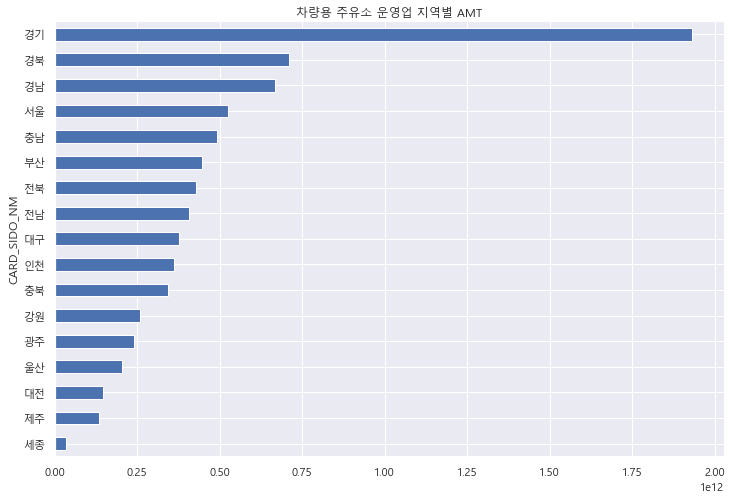

In [51]:
df1.plot(kind="barh", figsize=(12,8))
plt.title("차량용 주유소 운영업 지역별 AMT")

-경기 지역이 압도적 

REG_YYMM
201901    483447902660
201902    420183533685
201903    499290480565
201904    500426190266
201905    554833565580
201906    521482750657
201907    516825325346
201908    559073100080
201909    515931587383
201910    564749814043
201911    578179122164
201912    569564005010
202001    518733786068
202002    452943658569
202003    452987251807
Name: AMT, dtype: int64


Text(0.5, 1.0, '한식업 기간별 AMT')

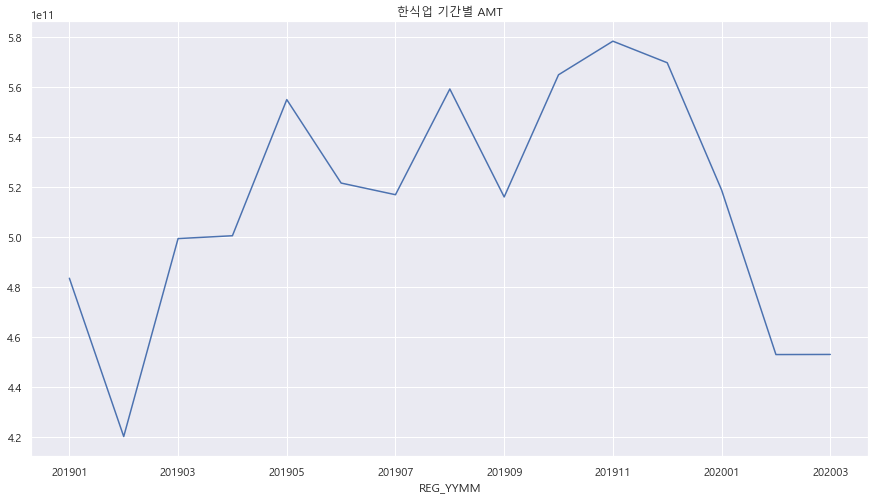

In [53]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("한식업 기간별 AMT")

-변동 범위가 적은 편(420183533685 ~578179122164)

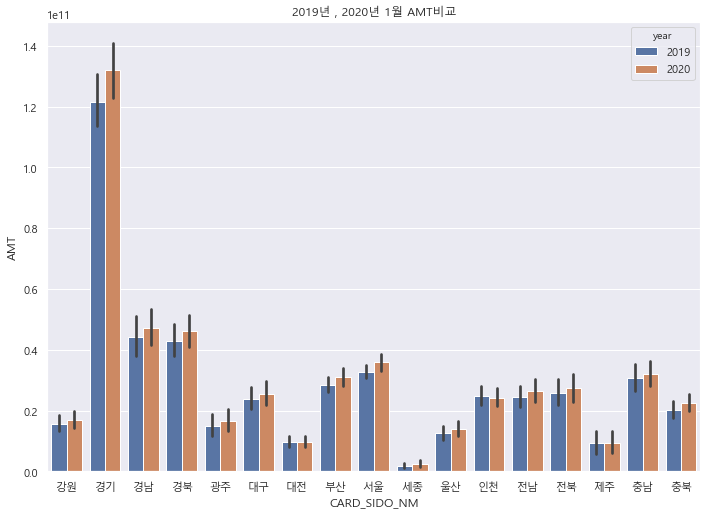

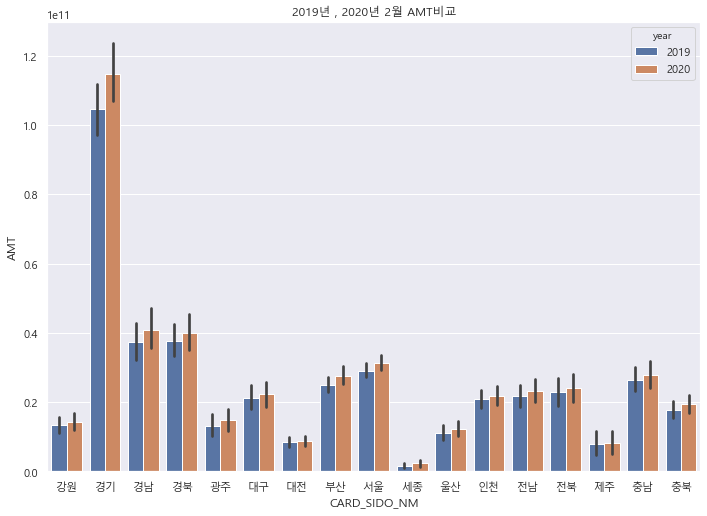

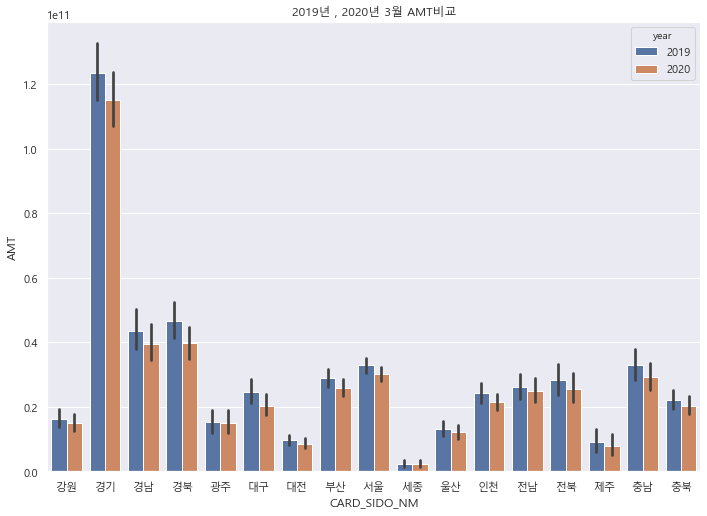

In [55]:
for i in range(1, 4):
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

-코로나의 영향이 적은 업종으로 보임...

AGE
10s        441078445
20s     243620317637
30s    1062284105375
40s    1864178764905
50s    2480988015198
60s    1656416383021
70s     400723409302
Name: AMT, dtype: int64


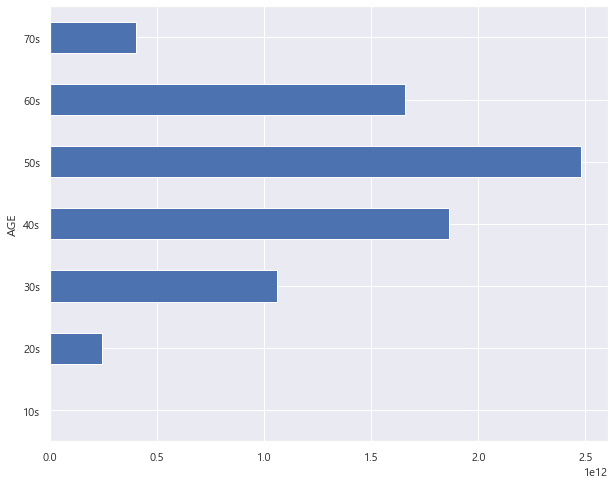

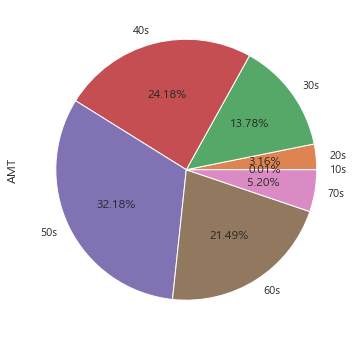

In [56]:
df3 = df.groupby('AGE')['AMT'].sum()
print(df3)
df3.plot(kind='barh', figsize=(10,8))
plt.show()
df3.plot(kind='pie',autopct='%1.2f%%',figsize=(6,6))

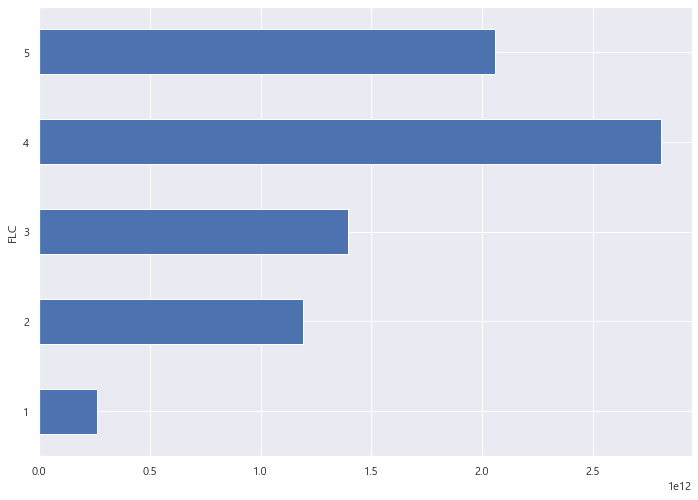

In [57]:
FLC = df.groupby('FLC')['AMT'].sum()
FLC.plot(kind='barh')

In [59]:
df4 =carOil[carOil.CARD_SIDO_NM == carOil.HOM_SIDO_NM]
df5 =carOil[carOil.CARD_SIDO_NM != carOil.HOM_SIDO_NM]
print(df4.info())
print(df5.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604308 entries, 0 to 1613475
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      604308 non-null  object
 1   CARD_SIDO_NM  604308 non-null  object
 2   CARD_CCG_NM   603964 non-null  object
 3   STD_CLSS_NM   604308 non-null  object
 4   HOM_SIDO_NM   604308 non-null  object
 5   HOM_CCG_NM    603964 non-null  object
 6   AGE           604308 non-null  object
 7   SEX_CTGO_CD   604308 non-null  int64 
 8   FLC           604308 non-null  int64 
 9   CSTMR_CNT     604308 non-null  int64 
 10  AMT           604308 non-null  int64 
 11  CNT           604308 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 59.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009168 entries, 147 to 1613372
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   REG_YYMM      1009168 

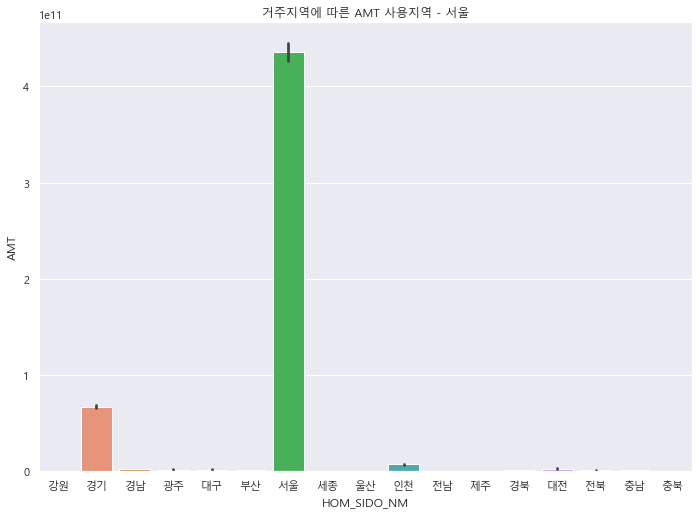

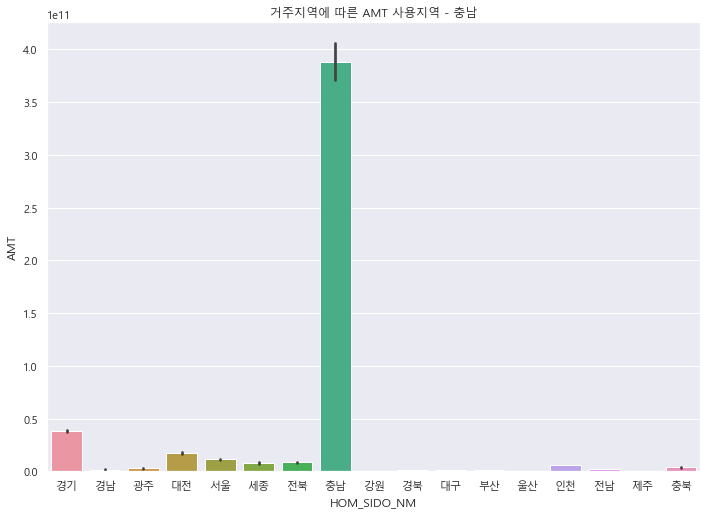

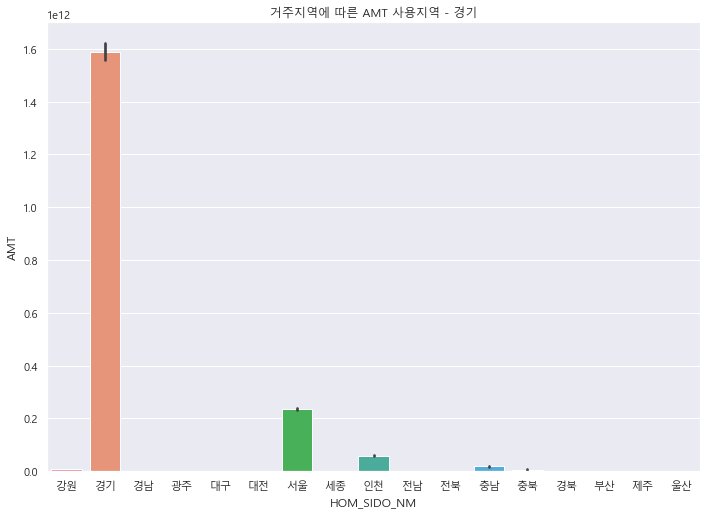

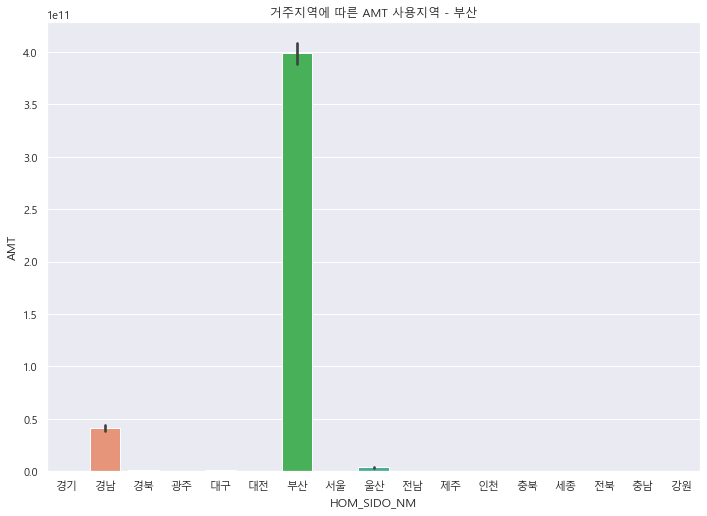

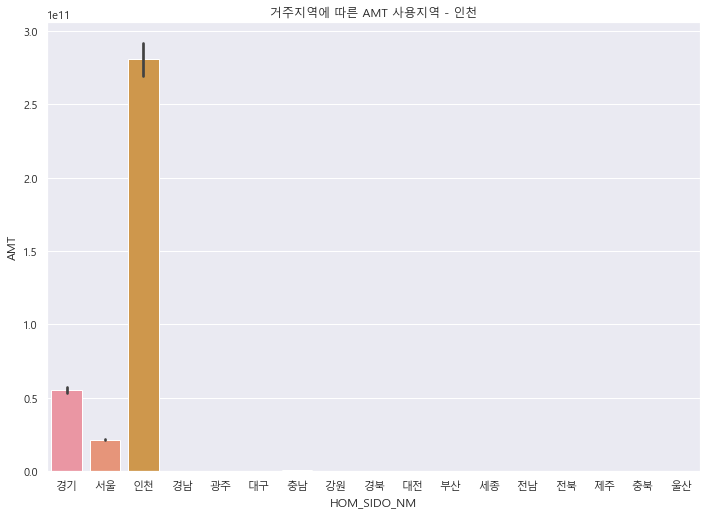

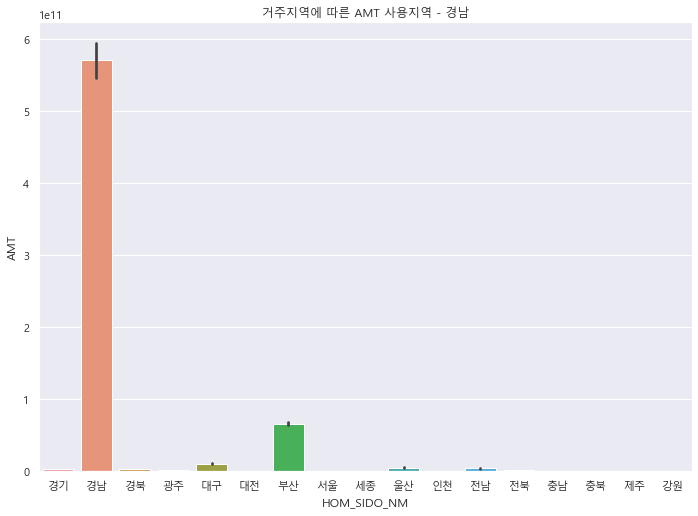

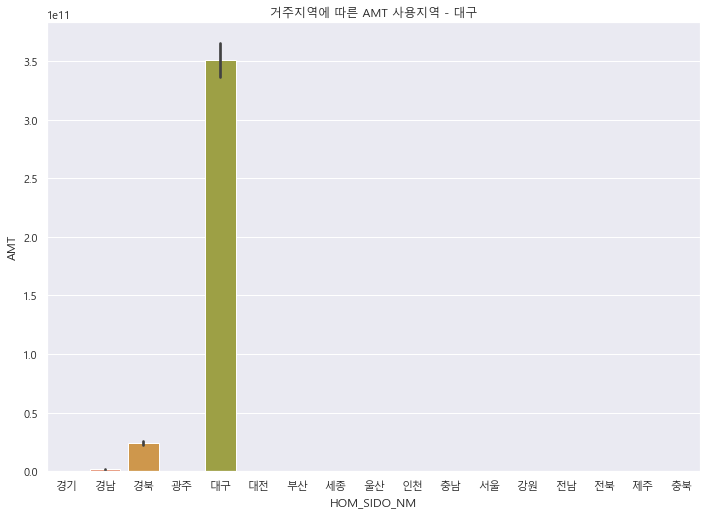

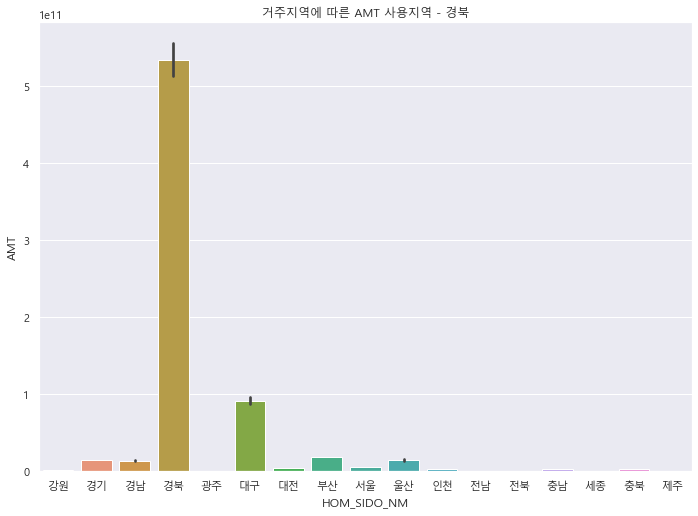

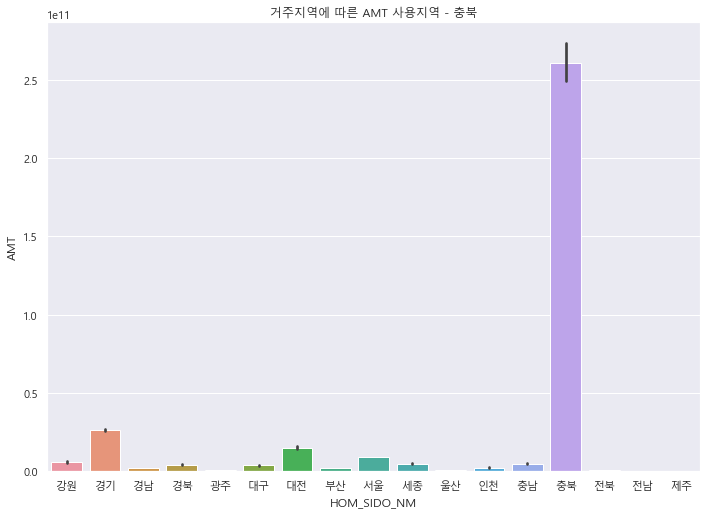

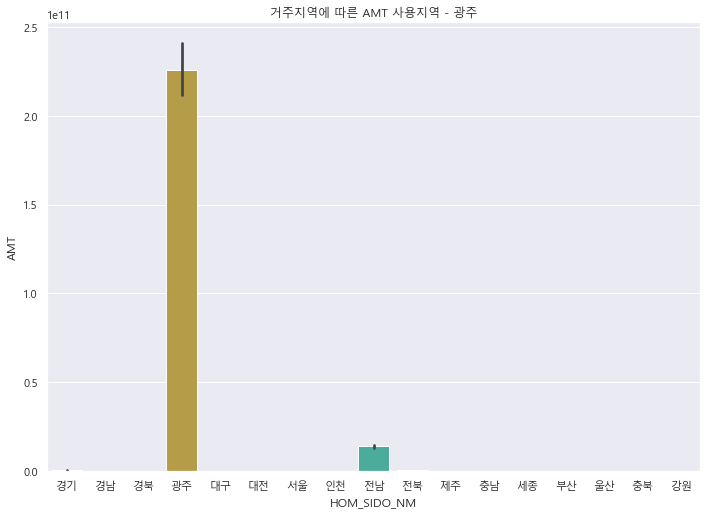

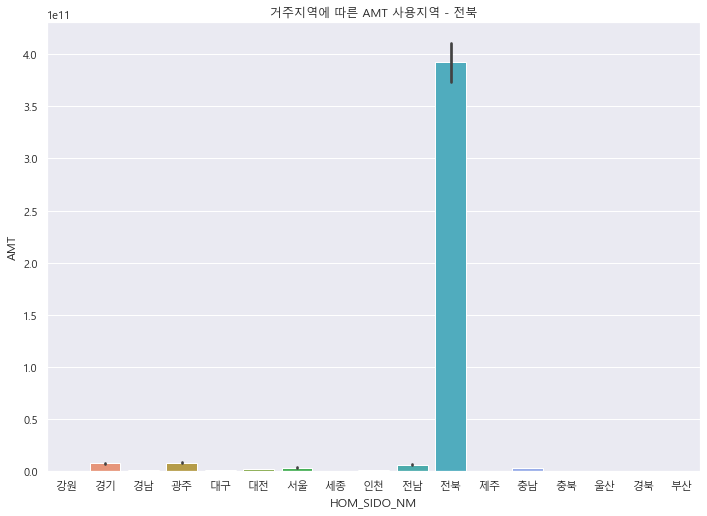

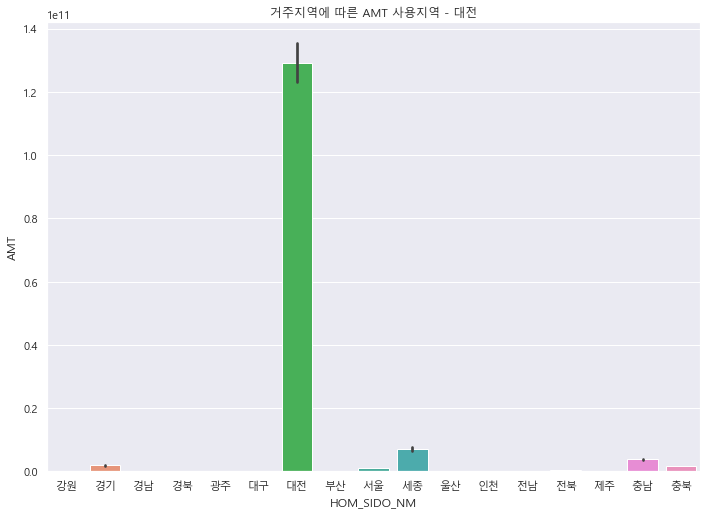

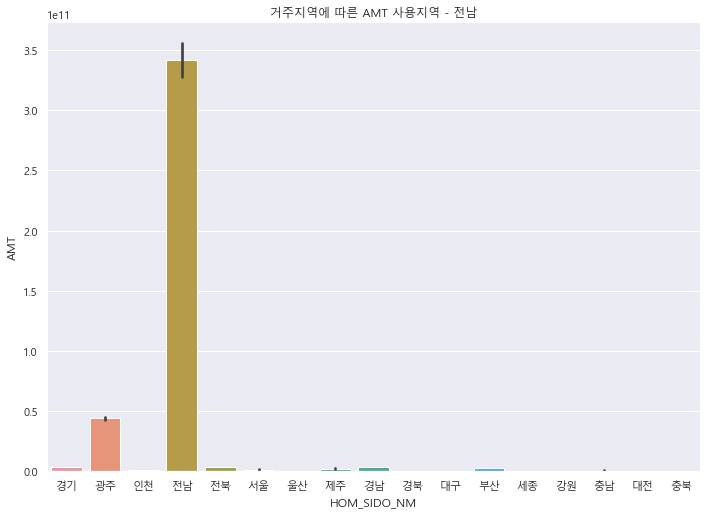

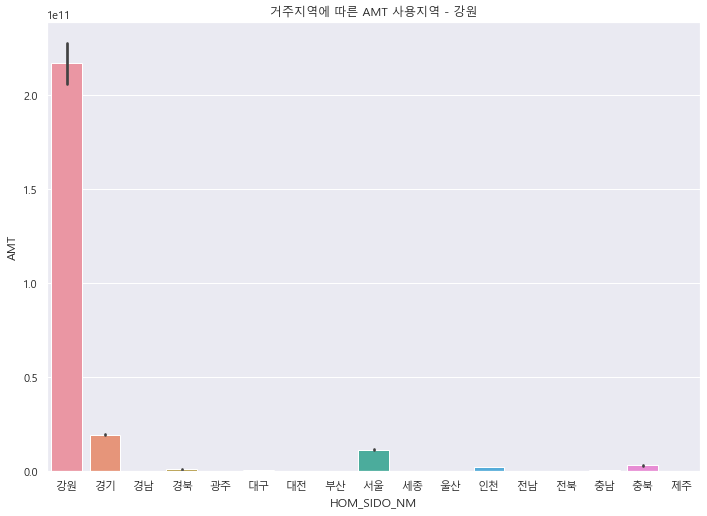

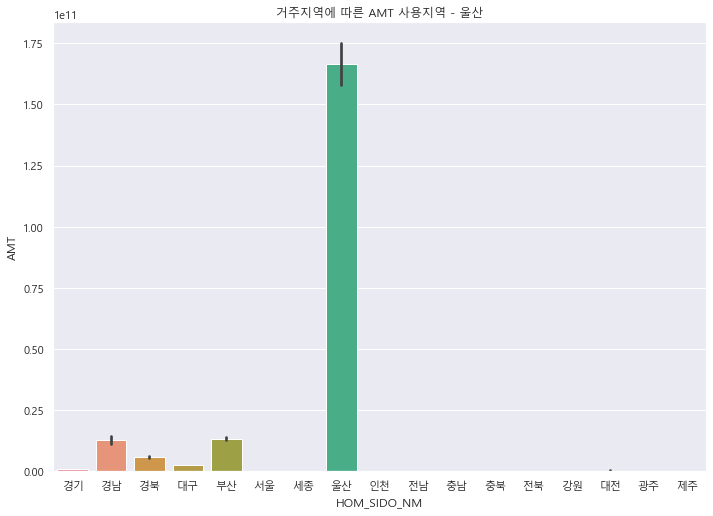

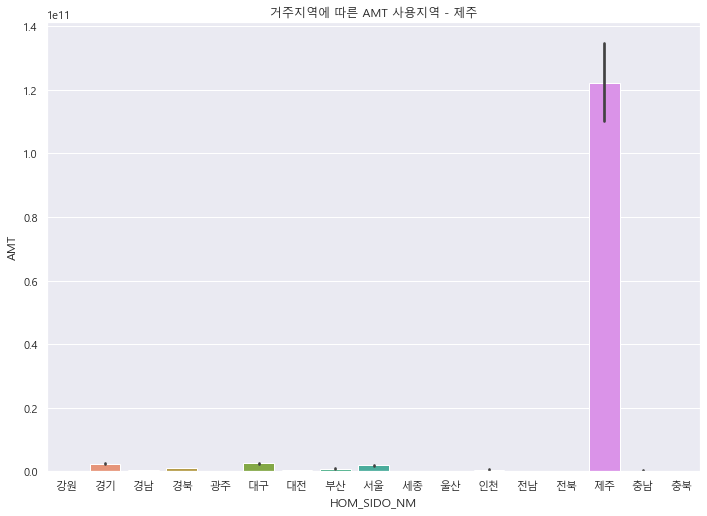

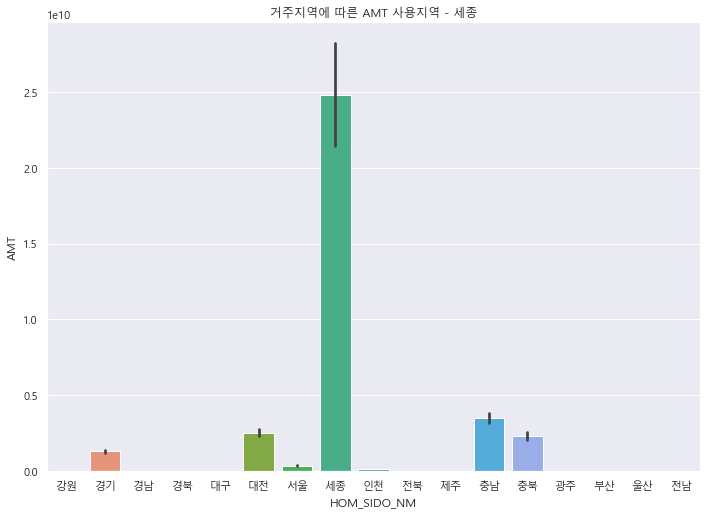

In [49]:
cols = ['서울', '충남', '경기', '부산', '인천','경남', '대구', '경북', '충북', '광주','전북','대전', '전남', '강원', '울산', '제주', '세종']
    
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df[df.CARD_SIDO_NM == val], x = 'HOM_SIDO_NM', y = 'AMT',  estimator = sum)
    plt.title('거주지역에 따른 AMT 사용지역 - ' + val)
    plt.show()